**Mall Customers Clustering Analysis**

In [4]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# for data analysis
import dabl

**Reading the Dataset**

In [5]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

## Descriptive Statistics

In [6]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Clustering Analysis

In [7]:
# perfrom clusters of customers who share similar behaviour based on Spending score, and Annual Income

#import the warnings library to avoid warnings
import warnings
warnings.filterwarnings('ignore')

#Select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

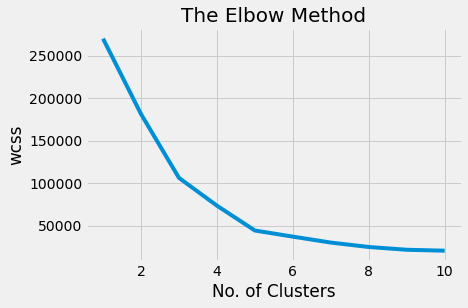

In [8]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Visualizaing the Clusters**

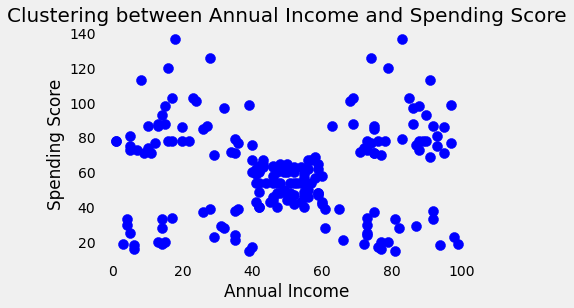

In [9]:
#Visualize these clusters

plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'blue')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'blue')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'blue')


plt.style.use('fivethirtyeight')
plt.title('Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

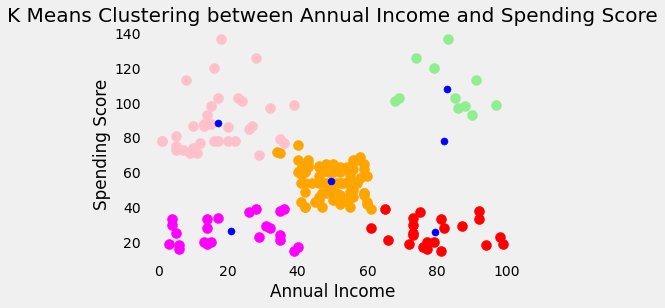

In [12]:
#Visualize these clusters

plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Target Customers(young)' )
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(old)')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'red', label = 'General Customers(Old)')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'magenta', label = 'General Customers(young)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

Using Sillhouete score to determine the accuracy of the K Means

In [13]:
from sklearn.metrics import silhouette_score

#calculate the score
score=silhouette_score(x, km.labels_, metric='euclidean')

#print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.538


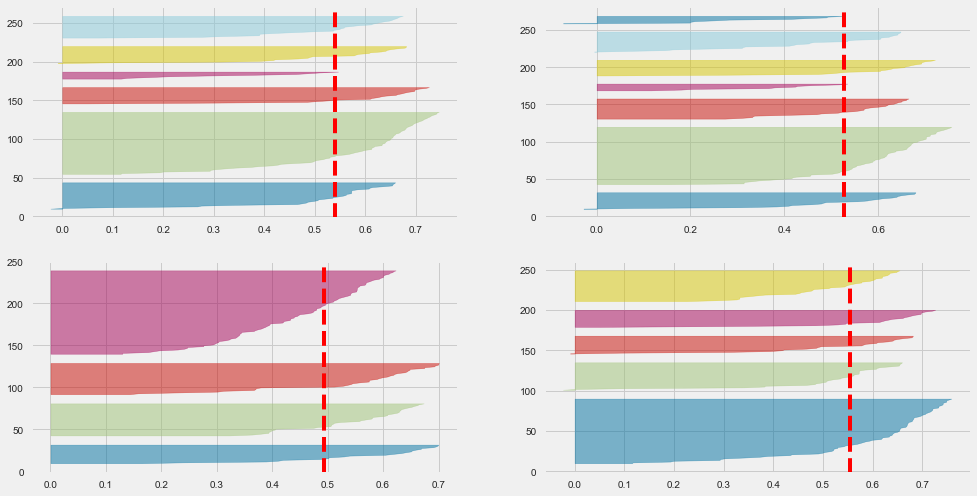

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax=plt.subplots(2,2, figsize=(15,8))
for i in [4,5,6,7]:
    #Create KMeans instance for different number of cluster
    km=KMeans(n_clusters=i, init='k-means++',n_init=10, max_iter=100, random_state=42)
    q,mod=divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer=SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-3][mod])
    visualizer.fit(x)